In [82]:
import os
import defopt
import logging
import deepdish as dd
import numpy as np
from videoreader import VideoReader
from leap_utils.preprocessing import export_boxes, angles, normalize_boxes
from leap_utils.postprocessing import process_confmaps_simple
from leap_utils.predict import predict_confmaps, load_network
from leap_utils.plot import vplay, confmaps, boxpos
import matplotlib.pyplot as plt

vr = VideoReader('localhost-20180720_182837_boxes.mp4')
print(vr)
network_path = '../leap_training_data/best_model.h5'
box_size = [120, 120]
network = load_network(network_path, image_size=box_size)
    

localhost-20180720_182837_boxes.mp4 with 359998 frames of size (120, 120, 3) at 99.99 fps


In [163]:
frames = list(vr[18000:29000:500])
boxes = np.zeros((len(frames), *frames[0].shape), dtype=np.uint8)
for idx, frame in enumerate(frames ):
    boxes[idx, ...] = frame#[::-1,...]

boxes = normalize_boxes(boxes)

cm = predict_confmaps(network, boxes[:, :, :, :1])
positions, confidence = process_confmaps_simple(cm)



1.3051513

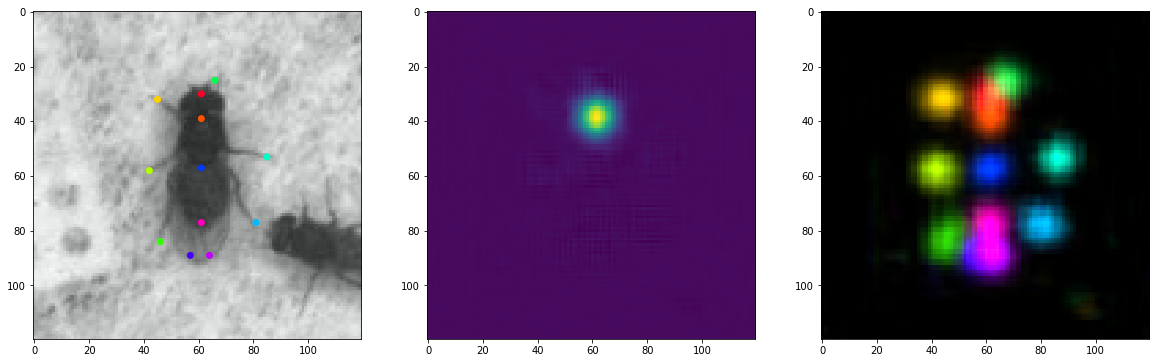

In [164]:
ii = 1
plt.gcf().set_size_inches(20, 10)
plt.subplot(131)
boxpos(boxes[ii,...], positions[ii,...])
plt.subplot(132)
plt.imshow(cm[ii,...,1])
plt.subplot(133)
confmaps(cm[ii,...])
confidence[ii,...]
np.max(cm)